# Feature Engineering(Dhaka-2018 Dataset)

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
aqi_data = pd.read_csv("G:\\AQI ML\\KHULNA DATA\\real_2018.csv")

In [4]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1-Jan,21,25.5,18,1010.9,77,5.1,0,-,NaN,NaN
1,2,18.6,22.5,16,1011.7,85,5,0,-,39.0,G
2,3,17.4,23.2,13.5,1012.7,72,4.8,1.7,7.6,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0,EU


In [5]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D         365 non-null    object 
 1   T         225 non-null    object 
 2   TM        225 non-null    object 
 3   Tm        225 non-null    object 
 4   SLP       225 non-null    object 
 5   H         225 non-null    object 
 6   VV        225 non-null    object 
 7   V         225 non-null    object 
 8   VM        225 non-null    object 
 9   AQI       216 non-null    float64
 10  Category  216 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.5+ KB


In [10]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
0,1-Jan,21,25.5,18,1010.9,...,5.1,0,-,NaN,NaN
1,2,18.6,22.5,16,1011.7,...,5,0,-,39.0,G
2,3,17.4,23.2,13.5,1012.7,...,4.8,1.7,7.6,NaN,NaN
3,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,396.0,EU
4,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,372.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,-,-,-,-,...,-,-,-,NaN,NaN
361,28,-,-,-,-,...,-,-,-,NaN,NaN
362,29,-,-,-,-,...,-,-,-,NaN,NaN
363,30,-,-,-,-,...,-,-,-,NaN,NaN


In [13]:
aqi_data.isnull().sum()

D             0
T           140
TM          140
Tm          140
SLP         140
H           140
VV          140
V           140
VM          140
AQI         149
Category    149
dtype: int64

In [14]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
0,1-Jan,21,25.5,18,1010.9,...,5.1,0,NaN,NaN,NaN
1,2,18.6,22.5,16,1011.7,...,5,0,NaN,39.0,G
2,3,17.4,23.2,13.5,1012.7,...,4.8,1.7,7.6,NaN,NaN
3,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,396.0,EU
4,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,372.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
361,28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
362,29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
363,30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [15]:
aqi.isnull().sum()

D             0
T           212
TM          212
Tm          212
SLP         212
H           212
VV          212
V           212
VM          239
AQI         149
Category    149
dtype: int64

<AxesSubplot:>

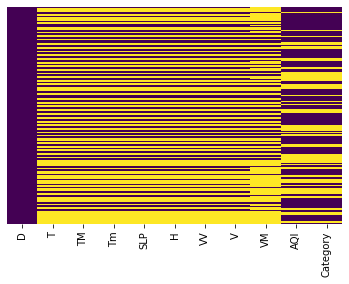

In [16]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Missing value Handling

                   1. Delete row data.
                   2. Create new model.
                   3. Statistical Method(Mean,Median,Mode)
                   
                   But here we use Statistical Method(Mean)

T = Average Temperature (°C) , TM = Maximum temperature (°C),

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa),

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


# Convert object type as float type

In [38]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1(January)

In [39]:
df1 = aqi.iloc[0:31,0:11]
df1

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
0,1-Jan,21.0,25.5,18.0,1010.9,...,5.1,0.0,NaN,NaN,NaN
1,2,18.6,22.5,16.0,1011.7,...,5.0,0.0,NaN,39.0,G
2,3,17.4,23.2,13.5,1012.7,...,4.8,1.7,7.6,NaN,NaN
3,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,396.0,EU
4,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,372.0,EU
5,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,324.0,EU
6,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,351.0,EU
7,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,366.0,EU
8,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,378.0,EU
9,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [40]:
df1.isnull().sum()

D            0
T           20
TM          20
Tm          20
SLP         20
H           20
VV          20
V           20
VM          24
AQI          4
Category     4
dtype: int64

In [41]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())
df1["AQI"] = df1["AQI"].fillna(value=df1["AQI"].mean())


In [42]:
df1 = df1.round(2)

In [43]:
df1

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
0,1-Jan,21.00,25.5,18.00,1010.90,...,5.10,0.00,4.13,346.22,NaN
1,2,18.60,22.5,16.00,1011.70,...,5.00,0.00,4.13,39.00,G
2,3,17.40,23.2,13.50,1012.70,...,4.80,1.70,7.60,346.22,NaN
3,4,17.54,24.0,12.54,1012.67,...,4.39,0.51,4.13,396.00,EU
4,5,17.54,24.0,12.54,1012.67,...,4.39,0.51,4.13,372.00,EU
5,6,17.54,24.0,12.54,1012.67,...,4.39,0.51,4.13,324.00,EU
6,7,17.54,24.0,12.54,1012.67,...,4.39,0.51,4.13,351.00,EU
7,8,17.54,24.0,12.54,1012.67,...,4.39,0.51,4.13,366.00,EU
8,9,17.54,24.0,12.54,1012.67,...,4.39,0.51,4.13,378.00,EU
9,10,17.54,24.0,12.54,1012.67,...,4.39,0.51,4.13,346.22,NaN


# Month-2 (February)

In [44]:
df2 = aqi.iloc[31:59,0:11]
df2

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
31,1-Feb,21.0,26.5,13.5,1011.6,...,4.8,0.0,NaN,329.0,EU
32,2,20.9,27.5,15.0,1012.0,...,4.5,0.0,NaN,363.0,EU
33,3,21.2,28.7,13.5,1013.2,...,4.5,0.6,3.5,358.0,EU
34,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,154.0,U
35,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,153.0,U
36,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,198.0,U
37,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,281.0,VU
38,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,160.0,U
39,9,23.8,30.0,15.5,1011.8,...,5.1,1.1,3.5,NaN,NaN
40,10,22.9,28.0,19.0,1014.9,...,4.7,0.4,3.5,NaN,NaN


In [45]:
df2.isnull().sum()

D            0
T           14
TM          14
Tm          14
SLP         14
H           14
VV          14
V           14
VM          17
AQI          4
Category     4
dtype: int64

In [46]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())
df2["AQI"] = df2["AQI"].fillna(value=df2["AQI"].mean())


In [47]:
df2 = df2.round(2)

In [48]:
df2

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
31,1-Feb,21.00,26.5,13.50,1011.6,...,4.80,0.00,4.1,329.00,EU
32,2,20.90,27.5,15.00,1012.0,...,4.50,0.00,4.1,363.00,EU
33,3,21.20,28.7,13.50,1013.2,...,4.50,0.60,3.5,358.00,EU
34,4,22.88,29.5,16.89,1012.8,...,4.99,0.66,4.1,154.00,U
35,5,22.88,29.5,16.89,1012.8,...,4.99,0.66,4.1,153.00,U
36,6,22.88,29.5,16.89,1012.8,...,4.99,0.66,4.1,198.00,U
37,7,22.88,29.5,16.89,1012.8,...,4.99,0.66,4.1,281.00,VU
38,8,22.88,29.5,16.89,1012.8,...,4.99,0.66,4.1,160.00,U
39,9,23.80,30.0,15.50,1011.8,...,5.10,1.10,3.5,194.62,NaN
40,10,22.90,28.0,19.00,1014.9,...,4.70,0.40,3.5,194.62,NaN


In [49]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-3(March)

In [52]:
df3 = aqi.iloc[59:90,0:11]
df3

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
59,1-Mar,25.6,32.0,21.0,1010.0,...,4.8,0.0,NaN,132.0,C
60,2,26.7,33.5,20.0,1008.3,...,4.5,1.5,7.6,NaN,NaN
61,3,26.7,34.0,22.5,1006.9,...,4.8,1.7,7.6,NaN,NaN
62,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
63,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
64,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
65,7,25.3,32.5,20.0,1011.9,...,6.1,0.7,3.5,84.0,M
66,8,24.1,32.2,17.0,1011.9,...,5.3,1.3,5.4,NaN,NaN
67,9,24.7,32.3,17.2,1010.8,...,5.5,0.4,3.5,NaN,NaN
68,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [53]:
df3.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          16
AQI         15
Category    15
dtype: int64

In [54]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())
df3["AQI"] = df3["AQI"].fillna(value=df3["AQI"].mean())

In [55]:
df3= df3.round(2)
df3

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
59,1-Mar,25.60,32.00,21.00,1010.00,...,4.80,0.00,4.99,132.00,C
60,2,26.70,33.50,20.00,1008.30,...,4.50,1.50,7.60,108.44,NaN
61,3,26.70,34.00,22.50,1006.90,...,4.80,1.70,7.60,108.44,NaN
62,4,27.28,33.51,21.44,1009.86,...,5.48,1.26,4.99,108.44,NaN
63,5,27.28,33.51,21.44,1009.86,...,5.48,1.26,4.99,108.44,NaN
64,6,27.28,33.51,21.44,1009.86,...,5.48,1.26,4.99,108.44,NaN
65,7,25.30,32.50,20.00,1011.90,...,6.10,0.70,3.50,84.00,M
66,8,24.10,32.20,17.00,1011.90,...,5.30,1.30,5.40,108.44,NaN
67,9,24.70,32.30,17.20,1010.80,...,5.50,0.40,3.50,108.44,NaN
68,10,27.28,33.51,21.44,1009.86,...,5.48,1.26,4.99,108.44,NaN


In [56]:
df3.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    15
dtype: int64

# Month-4(April)

In [59]:
df4 = aqi.iloc[90:120,0:11]
df4

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
90,1-Apr,26.3,34.2,19.4,1010.1,...,5.5,2.6,11.1,NaN,NaN
91,2,25.2,29.5,21.8,1010.2,...,5.6,0.9,3.5,117.0,C
92,3,26.3,33.5,21.2,1008.6,...,6.3,0.0,NaN,131.0,C
93,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,129.0,C
94,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,62.0,M
95,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,61.0,M
96,7,27.2,33.5,22.0,1010.1,...,5.5,1.1,3.5,56.0,M
97,8,27.9,32.6,20.5,1011.1,...,6.4,1.3,3.5,54.0,M
98,9,30.8,34.0,27.7,1010.8,...,6.3,0.7,3.5,74.0,M
99,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,44.0,G


In [60]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          17
AQI         14
Category    14
dtype: int64

In [61]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())
df4["AQI"] = df4["AQI"].fillna(value=df4["AQI"].mean())



In [62]:
df4 = df4.round(2)
df4

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
90,1-Apr,26.30,34.20,19.40,1010.10,...,5.50,2.60,11.10,61.62,NaN
91,2,25.20,29.50,21.80,1010.20,...,5.60,0.90,3.50,117.00,C
92,3,26.30,33.50,21.20,1008.60,...,6.30,0.00,7.92,131.00,C
93,4,28.71,34.23,22.98,1008.36,...,6.07,3.08,7.92,129.00,C
94,5,28.71,34.23,22.98,1008.36,...,6.07,3.08,7.92,62.00,M
95,6,28.71,34.23,22.98,1008.36,...,6.07,3.08,7.92,61.00,M
96,7,27.20,33.50,22.00,1010.10,...,5.50,1.10,3.50,56.00,M
97,8,27.90,32.60,20.50,1011.10,...,6.40,1.30,3.50,54.00,M
98,9,30.80,34.00,27.70,1010.80,...,6.30,0.70,3.50,74.00,M
99,10,28.71,34.23,22.98,1008.36,...,6.07,3.08,7.92,44.00,G


In [63]:
df4.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    14
dtype: int64

# Month-5 (May)

In [64]:
df5 = aqi.iloc[120:151,0:11]
df5

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
120,1-May,27.8,33.0,20.5,1007.5,...,6.3,0.0,NaN,NaN,NaN
121,2,26.3,35.2,22.2,1008.3,...,6.4,1.5,11.1,NaN,NaN
122,3,28.2,33.2,21.5,1009.0,...,6.0,0.7,5.4,NaN,NaN
123,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
124,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
125,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.0,G
126,7,29.6,32.4,27.5,1006.0,...,5.8,7.0,11.1,38.0,G
127,8,30.7,36.2,26.5,1004.1,...,6.0,8.9,11.1,27.0,G
128,9,31.4,35.0,24.0,1006.3,...,6.1,8.0,11.1,NaN,NaN
129,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.0,G


In [65]:
df5.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          18
AQI         18
Category    18
dtype: int64

In [66]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())
df5["AQI"] = df5["AQI"].fillna(value=df5["AQI"].mean())

In [67]:
df5 = df5.round(2)
df5

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
120,1-May,27.80,33.00,20.50,1007.50,...,6.30,0.00,8.68,31.0,NaN
121,2,26.30,35.20,22.20,1008.30,...,6.40,1.50,11.10,31.0,NaN
122,3,28.20,33.20,21.50,1009.00,...,6.00,0.70,5.40,31.0,NaN
123,4,29.15,33.85,24.98,1005.46,...,6.07,3.67,8.68,31.0,NaN
124,5,29.15,33.85,24.98,1005.46,...,6.07,3.67,8.68,31.0,NaN
125,6,29.15,33.85,24.98,1005.46,...,6.07,3.67,8.68,21.0,G
126,7,29.60,32.40,27.50,1006.00,...,5.80,7.00,11.10,38.0,G
127,8,30.70,36.20,26.50,1004.10,...,6.00,8.90,11.10,27.0,G
128,9,31.40,35.00,24.00,1006.30,...,6.10,8.00,11.10,31.0,NaN
129,10,29.15,33.85,24.98,1005.46,...,6.07,3.67,8.68,26.0,G


In [68]:
df5.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    18
dtype: int64

# Month-6 (June)

In [69]:
df6 = aqi.iloc[151:181,0:11]
df6

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
151,1-Jun,27.9,34.0,26.0,1006.0,...,6.4,0.7,1.9,18.0,G
152,2,30.6,35.5,25.5,1005.0,...,6.4,2.2,3.5,23.0,G
153,3,29.3,34.8,27.0,1002.2,...,6.1,1.3,3.5,27.0,G
154,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.0,G
155,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.0,G
156,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.0,G
157,7,31.6,36.0,27.2,1001.6,...,6.4,0.7,3.5,24.0,G
158,8,31.3,36.0,27.8,998.2,...,6.1,0.4,3.5,NaN,NaN
159,9,30.4,35.5,26.0,995.1,...,6.4,0.4,1.9,NaN,NaN
160,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [70]:
df6.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI         12
Category    12
dtype: int64

In [71]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())


In [72]:
df6 = df6.round(2)
df6

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
151,1-Jun,27.90,34.00,26.00,1006.00,...,6.4,0.70,1.90,18.00,G
152,2,30.60,35.50,25.50,1005.00,...,6.4,2.20,3.50,23.00,G
153,3,29.30,34.80,27.00,1002.20,...,6.1,1.30,3.50,27.00,G
154,4,30.19,34.72,26.72,1000.08,...,6.2,1.67,4.23,32.00,G
155,5,30.19,34.72,26.72,1000.08,...,6.2,1.67,4.23,32.00,G
156,6,30.19,34.72,26.72,1000.08,...,6.2,1.67,4.23,32.00,G
157,7,31.60,36.00,27.20,1001.60,...,6.4,0.70,3.50,24.00,G
158,8,31.30,36.00,27.80,998.20,...,6.1,0.40,3.50,47.83,NaN
159,9,30.40,35.50,26.00,995.10,...,6.4,0.40,1.90,47.83,NaN
160,10,30.19,34.72,26.72,1000.08,...,6.2,1.67,4.23,47.83,NaN


In [73]:
df6.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    12
dtype: int64

# Month-7 (July)

In [74]:
df7 = aqi.iloc[181:212,0:11]
df7

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
181,1-Jul,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,44.0,G
182,2,29.7,33.4,27.0,1001.2,...,6.0,3.3,7.6,32.0,G
183,3,28.4,30.5,25.6,1000.2,...,5.5,0.4,3.5,NaN,NaN
184,4,28.2,30.5,26.6,1000.0,...,5.6,0.7,3.5,29.0,G
185,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,45.0,G
186,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.0,M
187,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,G
188,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.0,G
189,9,29.4,33.2,27.4,999.3,...,5.8,3.5,5.4,16.0,G
190,10,29.2,33.0,27.6,999.5,...,5.8,1.1,3.5,29.0,G


In [75]:
df7.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI         14
Category    14
dtype: int64

In [76]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())
df7["AQI"] = df7["AQI"].fillna(value=df7["AQI"].mean())

In [77]:
df7 = df7.round(2)
df7

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
181,1-Jul,29.01,32.31,26.65,998.98,...,5.92,2.86,6.09,44.00,G
182,2,29.70,33.40,27.00,1001.20,...,6.00,3.30,7.60,32.00,G
183,3,28.40,30.50,25.60,1000.20,...,5.50,0.40,3.50,28.71,NaN
184,4,28.20,30.50,26.60,1000.00,...,5.60,0.70,3.50,29.00,G
185,5,29.01,32.31,26.65,998.98,...,5.92,2.86,6.09,45.00,G
186,6,29.01,32.31,26.65,998.98,...,5.92,2.86,6.09,56.00,M
187,7,29.01,32.31,26.65,998.98,...,5.92,2.86,6.09,20.00,G
188,8,29.01,32.31,26.65,998.98,...,5.92,2.86,6.09,19.00,G
189,9,29.40,33.20,27.40,999.30,...,5.80,3.50,5.40,16.00,G
190,10,29.20,33.00,27.60,999.50,...,5.80,1.10,3.50,29.00,G


In [78]:
df7.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    14
dtype: int64

# Month-8 (August)

In [79]:
df8 = aqi.iloc[212:243,0:11]
df8

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
212,1-Aug,26.9,28.0,25.5,999.3,...,6.0,2.8,5.4,NaN,NaN
213,2,28.4,31.8,26.0,1001.3,...,6.0,0.4,3.5,52.0,M
214,3,28.6,33.0,26.2,1000.5,...,5.8,1.3,3.5,NaN,NaN
215,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
216,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
217,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.0,M
218,7,28.7,31.7,25.5,998.8,...,5.3,5.6,11.1,26.0,G
219,8,29.9,34.0,26.0,1001.3,...,6.3,4.1,7.6,37.0,G
220,9,29.2,33.2,27.2,1002.7,...,5.8,2.8,5.4,NaN,NaN
221,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,22.0,G


In [80]:
df8.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI         11
Category    11
dtype: int64

In [81]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [82]:
df8 = df8.round(2)
df8

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
212,1-Aug,26.90,28.00,25.50,999.3,...,6.00,2.8,5.40,32.75,NaN
213,2,28.40,31.80,26.00,1001.3,...,6.00,0.4,3.50,52.00,M
214,3,28.60,33.00,26.20,1000.5,...,5.80,1.3,3.50,32.75,NaN
215,4,29.28,32.79,26.65,1000.2,...,6.01,3.6,6.98,32.75,NaN
216,5,29.28,32.79,26.65,1000.2,...,6.01,3.6,6.98,32.75,NaN
217,6,29.28,32.79,26.65,1000.2,...,6.01,3.6,6.98,56.00,M
218,7,28.70,31.70,25.50,998.8,...,5.30,5.6,11.10,26.00,G
219,8,29.90,34.00,26.00,1001.3,...,6.30,4.1,7.60,37.00,G
220,9,29.20,33.20,27.20,1002.7,...,5.80,2.8,5.40,32.75,NaN
221,10,29.28,32.79,26.65,1000.2,...,6.01,3.6,6.98,22.00,G


In [83]:
df8.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    11
dtype: int64

# Month-9 (September)

In [84]:
df9 = aqi.iloc[243:273,0:11]
df9

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
243,1-Sep,29.4,33.0,27.0,1003.0,...,6.4,2.4,7.6,22.0,G
244,2,28.9,31.5,27.0,1003.3,...,5.8,3.3,5.4,20.0,G
245,3,28.3,32.5,26.6,1003.4,...,5.6,0.6,1.9,31.0,G
246,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.0,G
247,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31.0,G
248,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
249,7,29.3,32.4,26.0,1004.9,...,6.0,3.7,9.4,NaN,NaN
250,8,30.1,33.6,26.5,1006.2,...,6.1,2.0,3.5,NaN,NaN
251,9,28.7,34.5,26.0,1007.5,...,6.4,0.2,1.9,NaN,NaN
252,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [85]:
df9.isnull().sum()

D            0
T           18
TM          18
Tm          18
SLP         18
H           18
VV          18
V           18
VM          19
AQI         19
Category    19
dtype: int64

In [86]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())
df9["AQI"] = df9["AQI"].fillna(value=df9["AQI"].mean())


In [87]:
df9 = df9.round(2)
df9

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
243,1-Sep,29.40,33.00,27.00,1003.00,...,6.4,2.40,7.60,22.00,G
244,2,28.90,31.50,27.00,1003.30,...,5.8,3.30,5.40,20.00,G
245,3,28.30,32.50,26.60,1003.40,...,5.6,0.60,1.90,31.00,G
246,4,29.71,33.86,26.69,1005.83,...,6.0,1.21,4.03,42.00,G
247,5,29.71,33.86,26.69,1005.83,...,6.0,1.21,4.03,31.00,G
248,6,29.71,33.86,26.69,1005.83,...,6.0,1.21,4.03,48.73,NaN
249,7,29.30,32.40,26.00,1004.90,...,6.0,3.70,9.40,48.73,NaN
250,8,30.10,33.60,26.50,1006.20,...,6.1,2.00,3.50,48.73,NaN
251,9,28.70,34.50,26.00,1007.50,...,6.4,0.20,1.90,48.73,NaN
252,10,29.71,33.86,26.69,1005.83,...,6.0,1.21,4.03,48.73,NaN


In [88]:
df9.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    19
dtype: int64

# Month-10 (October)

In [89]:
df10 = aqi.iloc[273:304,0:11]
df10

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
273,1-Oct,30.2,36.5,25.5,1008.8,...,6.3,0.0,NaN,123.0,C
274,2,30.3,36.2,26.2,1008.8,...,5.8,0.7,3.5,89.0,M
275,3,31.0,36.0,27.0,1008.4,...,6.3,0.0,NaN,87.0,M
276,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,106.0,C
277,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,91.0,M
278,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,44.0,G
279,7,30.0,35.6,25.4,1009.6,...,6.1,0.0,NaN,130.0,C
280,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,118.0,C
281,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,41.0,G
282,10,25.5,29.8,24.5,1009.3,...,5.5,0.6,3.5,10.0,G


In [90]:
df10.isnull().sum()

D            0
T           21
TM          21
Tm          21
SLP         21
H           21
VV          21
V           21
VM          27
AQI         13
Category    13
dtype: int64

In [91]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())
df10["AQI"] = df10["AQI"].fillna(value=df10["AQI"].mean())

In [92]:
df10 = df10.round(2)
df10

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
273,1-Oct,30.20,36.50,25.50,1008.80,...,6.30,0.0,3.58,123.00,C
274,2,30.30,36.20,26.20,1008.80,...,5.80,0.7,3.50,89.00,M
275,3,31.00,36.00,27.00,1008.40,...,6.30,0.0,3.58,87.00,M
276,4,28.24,33.61,23.95,1010.49,...,5.97,0.3,3.58,106.00,C
277,5,28.24,33.61,23.95,1010.49,...,5.97,0.3,3.58,91.00,M
278,6,28.24,33.61,23.95,1010.49,...,5.97,0.3,3.58,44.00,G
279,7,30.00,35.60,25.40,1009.60,...,6.10,0.0,3.58,130.00,C
280,8,28.24,33.61,23.95,1010.49,...,5.97,0.3,3.58,118.00,C
281,9,28.24,33.61,23.95,1010.49,...,5.97,0.3,3.58,41.00,G
282,10,25.50,29.80,24.50,1009.30,...,5.50,0.6,3.50,10.00,G


In [93]:
df10.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    13
dtype: int64

# Month-11 (November)

In [94]:
df11 = aqi.iloc[304:334,0:11]
df11

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
304,1-Nov,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
305,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
306,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
307,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
308,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
309,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
310,7,25.2,30.0,23.2,1014.2,...,5.0,0.0,NaN,NaN,NaN
311,8,25.0,31.2,21.0,1012.6,...,5.3,0.0,NaN,NaN,NaN
312,9,22.8,30.0,18.0,1012.0,...,5.3,0.0,NaN,NaN,NaN
313,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [95]:
df11.isnull().sum()

D            0
T           21
TM          21
Tm          21
SLP         21
H           21
VV          21
V           21
VM          26
AQI         13
Category    13
dtype: int64

In [98]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())
df11["AQI"] = df11["AQI"].fillna(value=df11["AQI"].mean())

In [99]:
df11 = df11.round(2)
df11

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
304,1-Nov,23.86,30.26,19.06,1013.02,...,5.21,0.37,4.58,183.76,NaN
305,2,23.86,30.26,19.06,1013.02,...,5.21,0.37,4.58,183.76,NaN
306,3,23.86,30.26,19.06,1013.02,...,5.21,0.37,4.58,183.76,NaN
307,4,23.86,30.26,19.06,1013.02,...,5.21,0.37,4.58,183.76,NaN
308,5,23.86,30.26,19.06,1013.02,...,5.21,0.37,4.58,183.76,NaN
309,6,23.86,30.26,19.06,1013.02,...,5.21,0.37,4.58,183.76,NaN
310,7,25.20,30.00,23.20,1014.20,...,5.00,0.00,4.58,183.76,NaN
311,8,25.00,31.20,21.00,1012.60,...,5.30,0.00,4.58,183.76,NaN
312,9,22.80,30.00,18.00,1012.00,...,5.30,0.00,4.58,183.76,NaN
313,10,23.86,30.26,19.06,1013.02,...,5.21,0.37,4.58,183.76,NaN


In [100]:
df11.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    13
dtype: int64

# Month-12(December)

In [101]:
df12 = aqi.iloc[334:365,0:11]
df12

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
334,1-Dec,21.2,29.0,17.5,1014.4,...,5.1,0.0,NaN,190.0,U
335,2,21.2,28.5,16.0,1013.0,...,5.1,0.6,3.5,276.0,VU
336,3,20.5,27.6,15.8,1015.1,...,4.8,0.0,NaN,316.0,EU
337,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,186.0,U
338,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,191.0,U
339,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
340,7,19.2,28.0,14.0,1013.2,...,5.0,0.0,NaN,NaN,NaN
341,8,19.3,27.8,13.8,1013.9,...,5.0,0.6,3.5,NaN,NaN
342,9,19.4,27.2,13.2,1013.6,...,4.8,0.2,1.9,175.0,U
343,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,179.0,U


In [102]:
df12.isnull().sum() 

D            0
T           25
TM          25
Tm          25
SLP         25
H           25
VV          25
V           25
VM          28
AQI         12
Category    12
dtype: int64

In [103]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())
df12["AQI"] = df12["AQI"].fillna(value=df12["AQI"].mean())

In [104]:
df12 = df12.round(2)
df12

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
334,1-Dec,21.20,29.00,17.50,1014.40,...,5.10,0.00,2.97,190.00,U
335,2,21.20,28.50,16.00,1013.00,...,5.10,0.60,3.50,276.00,VU
336,3,20.50,27.60,15.80,1015.10,...,4.80,0.00,2.97,316.00,EU
337,4,20.13,28.02,15.05,1013.87,...,4.97,0.23,2.97,186.00,U
338,5,20.13,28.02,15.05,1013.87,...,4.97,0.23,2.97,191.00,U
339,6,20.13,28.02,15.05,1013.87,...,4.97,0.23,2.97,202.32,NaN
340,7,19.20,28.00,14.00,1013.20,...,5.00,0.00,2.97,202.32,NaN
341,8,19.30,27.80,13.80,1013.90,...,5.00,0.60,3.50,202.32,NaN
342,9,19.40,27.20,13.20,1013.60,...,4.80,0.20,1.90,175.00,U
343,10,20.13,28.02,15.05,1013.87,...,4.97,0.23,2.97,179.00,U


In [105]:
df12.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    12
dtype: int64

# Add 12 months frame in a single frame

In [106]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,...,VV,V,VM,AQI,Category
0,1-Jan,21.00,25.50,18.00,1010.90,...,5.10,0.00,4.13,346.22,NaN
1,2,18.60,22.50,16.00,1011.70,...,5.00,0.00,4.13,39.00,G
2,3,17.40,23.20,13.50,1012.70,...,4.80,1.70,7.60,346.22,NaN
3,4,17.54,24.00,12.54,1012.67,...,4.39,0.51,4.13,396.00,EU
4,5,17.54,24.00,12.54,1012.67,...,4.39,0.51,4.13,372.00,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,20.13,28.02,15.05,1013.87,...,4.97,0.23,2.97,202.32,NaN
361,28,20.13,28.02,15.05,1013.87,...,4.97,0.23,2.97,202.32,NaN
362,29,20.13,28.02,15.05,1013.87,...,4.97,0.23,2.97,202.32,NaN
363,30,20.13,28.02,15.05,1013.87,...,4.97,0.23,2.97,202.32,NaN


In [107]:
data.isnull().sum()

D             0
T             0
TM            0
Tm            0
SLP           0
H             0
VV            0
V             0
VM            0
AQI           0
Category    149
dtype: int64

# AQI Range

1) 0 - 50 = GOOD

2) 51 - 100 = MODERATE

3) 101 - 150 = CAUTION

4) 151 - 200 = UNHEALTHY

5) 201 - 300 = VERY UNHEALTHY

6) 301- 500 = EXTREMELY HEALTHY

In [108]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [109]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [110]:
data.to_csv(r'G:\AQI ML\KHULNA DATA\Data-2018.csv', index=False)